In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Data Creation

In [2]:
mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1, 0.1], [0.1, 1.2]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1, 0.1], [0.1, 1.2]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)
print(dist_01.shape, dist_02.shape)

(500, 2) (500, 2)


We have created two normal distributions with same covariance but different mean 

## Plotting the created Data 

Notice the 2 unique clusters being formed 

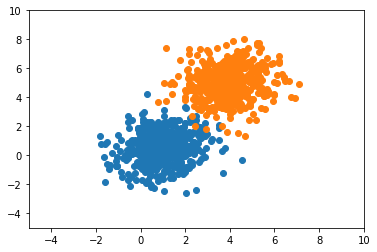

In [3]:
plt.figure(0)
plt.xlim(-5, 10)
plt.ylim(-5, 10)

plt.scatter(dist_01[:, 0], dist_01[:, 1])
plt.scatter(dist_02[:, 0], dist_02[:, 1])#, color='red')
plt.show()

In [4]:
r = dist_01.shape[0] + dist_02.shape[0]
c = dist_01.shape[1] + 1
data = np.zeros((r, c))
print(data.shape)

data[:dist_01.shape[0], :2] = dist_01
data[dist_01.shape[0]:, :2] = dist_02
data[dist_01.shape[0]:, -1] = 1.0

print(data.mean(axis=0))

(1000, 3)
[2.45648328 2.76525115 0.5       ]


In [5]:
np.random.shuffle(data)
print(data[:10])

[[4.4609042  3.13813365 1.        ]
 [1.70472226 0.88369925 0.        ]
 [2.77872192 4.93385893 1.        ]
 [3.56151447 6.20285133 1.        ]
 [3.70925322 4.01187848 1.        ]
 [2.14882119 0.64677207 0.        ]
 [0.27358695 0.47913802 0.        ]
 [5.44099646 6.40395517 1.        ]
 [0.95856962 1.6369603  0.        ]
 [1.39524376 0.05460838 0.        ]]


In [6]:
def distance(pt1, pt2):
    #TODO
    #return ((pt1[0]-pt2[0])**2 + (pt1[1]-pt2[1])**2) #Eucledian Distance between 2 points
    return np.sum(np.multiply(np.subtract(pt1,pt2),np.subtract(pt1,pt2)),axis=0)
    
def knn(X_train, y_train, xt, k=7): #xt is the point to be tested and K is the number of neighbors (default values is kept 7)
    #TODO
    dist_tup = [] #List of Distance Tuples
    for i in range(len(X_train)): #Iterating over Training data
        dist = distance(X_train[i],xt)
        dist_tup.append((dist,y_train[i])) #Making a Tuple of distance and the label
    #print(dist_tup)
    sorted_list = sorted(dist_tup, key=lambda x: x[0]) #Ascending order Sorting the list according to distances
    final_list = sorted_list[:k] #Taking only the least k distances i.e. only the nearest K neighbors
    #print(final_list)
    d = {}
    #Now we want the label which has the majority of neighbors
    for i in final_list: # Iterating over the k neighbors
        if int(i[1]) in d.keys(): #Checking if the label is already present
            d[int(i[1])] = d[int(i[1])] + 1
        else:
            d[int(i[1])] =  1
    inverse = [(value, key) for key, value in d.items()] #Changing the order of tuples from (count,label) to (label,count)
    return max(inverse)[1] #Return label with max count

In [7]:
test_point = np.array([8, -4])

#De-comment the line below and check if it comes out as 0.0  
print(knn(data[:, :2], data[:, -1], test_point))

0


## Let us create train and test data now

In [8]:
np.random.shuffle(data)
split = int(0.75 * data.shape[0]) #75% Training and 25% Testing
# print split
X_train = data[:split, :2]
y_train = data[:split, -1]
X_test = data[split:, :2]
y_test = data[split:, -1]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(750, 2) (750,)
(250, 2) (250,)


In [9]:
def get_acc(kx): # kx is number of neighbors
    correct = 0
    for i in range(len(X_test)):
        predicted = knn(X_train, y_train, X_test[i], kx)
        if int(round(predicted)) == int(round(y_test[i])):
            correct=correct+1
    return 100*correct/len(X_test)

#De-comment the line below and You should get about 99 percent accuracy
print(get_acc(7))

98.8


Let us try different values of K 

In [10]:
for ix in range(2, 20):
    print ("k:", ix, "| Acc:", get_acc(ix))

k: 2 | Acc: 98.4
k: 3 | Acc: 98.8
k: 4 | Acc: 98.4
k: 5 | Acc: 99.2
k: 6 | Acc: 98.8
k: 7 | Acc: 98.8
k: 8 | Acc: 99.2
k: 9 | Acc: 99.2
k: 10 | Acc: 99.2
k: 11 | Acc: 99.2
k: 12 | Acc: 99.2
k: 13 | Acc: 99.2
k: 14 | Acc: 99.2
k: 15 | Acc: 99.2
k: 16 | Acc: 99.2
k: 17 | Acc: 99.2
k: 18 | Acc: 98.8
k: 19 | Acc: 98.8


## Now let us try real data : MNIST

In [11]:
import pandas as pd
import datetime

Download train.csv from https://www.kaggle.com/c/digit-recognizer/data

In [12]:
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data = df.values[:2000]
print (data.shape)

(2000, 785)


In [14]:
split = int(0.8 * data.shape[0]) #20% Testing Data

X_train = data[:split, 1:]
X_test = data[split:, 1:]

y_train = data[:split, 0]
y_test = data[split:, 0]

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1600, 784) (1600,)
(400, 784) (400,)


3


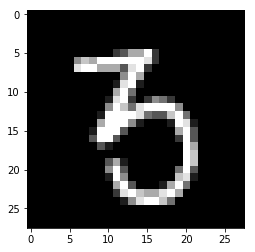

In [15]:
plt.figure(0)
plt.imshow(X_train[90].reshape((28, 28)), cmap='gray', interpolation='none')
print (y_train[90])
plt.show()

Now code get_acc and try different values of k 

In [16]:
def get_acc(kx):
    correct = 0
    for i in range(len(X_test)):
        predicted = knn(X_train, y_train, X_test[i], kx)
        if int(round(predicted)) == int(round(y_test[i])):
            correct=correct+1
    return 100*correct/len(X_test)

#print (get_acc(kx=))

In [17]:
print(get_acc(kx=4))

88.25
